# COGS 108 - Why are Americans Obese?

Group video link: https://www.youtube.com/watch?v=CJ7DImrM9rw 

## Permissions

Made available to the public

* [X] YES - make available
* [] NO - keep private

# Overview

Driven from the concern of our physical health, we wanted to study further on health data analysis. Therefore, we looked at the obesity rates across all counties in the United States. We began by narrowing it down to the top 100 counties with the highest obesity rate. We then explored the relationship between obesity and the following three factors: income, mental health providers in a county, and the number of people who have long commutes daily. We did this to see if there was any correlation between them. After the comparison of top-ranked counties, we did a linear regression assessment on obesity and these three features. We found that there is a linear relationship between obesity and income, but no significant relationship between obesity and the other two factors. 

Our report contains high-level information about the dataset, set-up, data cleaning process, EDA, and conclusion. Some of the contents are omitted to improve readability. Detailed work can be found in the Github repository [here](https://github.com/COGS108/Group005Sp22).



# Names

    Joon Cha
    Jaida Day
    Ayushi Sharma
    Yunyi She
    Ziyu Wang

<a id='research_question'></a>
# Research Question

How does income, mental health providers, and long commutes affect the obesity rate across United States counties in the year 2019? 

## Background & Prior Work

As college students, we should maintain our health while studying hard. Obesity appears frequently in our life, which is defined as abnormal 'fat accumulation' that presents a higher risk to health by [WHO](https://www.who.int/health-topics/obesity#tab=tab_1)$_1$. As per [Healthline Media](https://www.healthline.com/health/obesity/managing-obesity-health-risks#gallbladderdisease)$_2$, obesity could lead to several health issues such as “type 2 diabetes”, “heart disease”, “high blood pressure”, etc. Also according to [WHO](https://www.who.int/health-topics/obesity#tab=tab_1)$_1$, the issue of obesity has globally grown to epidemic proportions, with over 4 million people dying each year as a result of being overweight or obese in 2017 according to the global burden of disease. Our group considers obesity as one of the most significant health problems in the United States, which is why it is the main topic of our study.

Initially, we conducted a preliminary research by talking with our college peers and family members to figure out what they think could lead to obesity. From these dialogues, we found out that there exists an unclear and over-superficial understanding of obesity among people. The majority of people were under a similar impression that unhealthy/oily fast food could lead to obesity. As the report from [CBS](https://www.cbsnews.com/news/junk-food-obesity-epidemic/)$_3$ stated, researchers suggest that junk food is not the only cause of obesity. Our group also thinks that there are several other reasons beyond just having unhealthy food that could lead to obesity across different counties in the US. Additionally, our group wants to find more interesting features that could potentially lead to obesity in the hopes of spreading awareness and hopefully preventing people from risking their lives with obesity.

Therefore, we conclude that people’s wealth, mental health, and working conditions (specifically related to time spent on commuting) may also affect obesity, which produces our study question.
<br>
<br>

References:

$1.$ “Obesity.” WHO, 21 Feb. 2020, www.who.int/health-topics/obesity#tab=tab_1.

$2.$ “Common Health Conditions Related to Obesity.” Healthline, 29 July 2020, www.healthline.com/health/obesity/managing-obesity-health-risks.

$3.$ Welch, Ashley. “Is Junk Food to Blame for the Obesity Epidemic?” CBS News, 5 Nov. 2015, www.cbsnews.com/news/junk-food-obesity-epidemic.

# Hypothesis

Null Hypothesis ($H_0$): In 2019, there is no relationship between income, number of health providers, and long commute and obesity in the US Counties.	

Let:

x₁ = Income

x₂ = Number of mental health providers
 
x₃ = Long commute alone

x₁ > x̂₁ <br> 
x₂ > x̂₂ <br>
x₃ < x̂₃

Then, obesity rate will be lower than average.

Alternative Hypothesis ($H_1$): In 2019, there is a relationship between income, number of mental health providers, long commute and obesity in the US Counties.	

# Dataset(s)

Dataset Introduction:

- Name: 2019 County Health Rankings CSV Analytic Data <br>
- Link to the dataset: https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation/national-data-documentation-2010-2019 <br>
- Number of observations: 3193 <br>
- Description of data: This data counts the number and percentage of the Unitied States population, by county, who fall under certain factors.


# Setup

Python package import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

import warnings
warnings.filterwarnings('ignore')

We downloaded the data from online website [County Health Rankings & Roadmaps](https://www.countyhealthrankings.org/explore-health-rankings), and we imported the data by pandas and display here.

In [2]:
df = pd.read_csv("2019.csv", low_memory=False)
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

We found that our data is relatively clean, so we decicided to simplify the contents and labels furthermore.

In [3]:
# drop rows description
df = df.drop([0])

# select relevant columns
col_str = "State Abbreviation,County FIPS Code,Name,Mental health providers raw value,\
Mental health providers denominator,Long commute - driving alone raw value,\
Long commute - driving alone denominator,Median household income raw value,\
Adult obesity raw value,Adult obesity denominator"
col_lst = col_str.split(",")
df = df[col_lst]

# Rename those long columns names in the dataset and change all columns name into lower case.
new_col_lst = ['state','code','county','mental_health','mental_health_total','long_commute','long_commute_total','income','obesity','obesity_total']
df = df.rename(columns = dict(zip(list(df.columns),new_col_lst)))

This data counts the percentage and total count of the population, by county, who fall under the following factors: obesity rate, their income, if they have mental health providers, and if they have a long commute alone. Now, the dataframe has been set up, and we will process further cleaning about numerical values.

In [4]:
# We discard all rows that contain data from state.
# '000' represents the state version data
df = df.loc[df['code'] != '000']
'000' not in list(df.code)

True

In [5]:
# Check missingness for the dataset
df.isnull().any()

state                  False
code                   False
county                 False
mental_health           True
mental_health_total    False
long_commute           False
long_commute_total     False
income                  True
obesity                False
obesity_total          False
dtype: bool

We can find that there exist null values in the columns **mental_health** and **income**, therefore we drop null cells from the dataset.

In [6]:
df_clean = df.dropna()
df_clean.isnull().sum().sum()

0

In [7]:
# Reset index for df_clean
df_clean.reset_index(inplace=True)
df_clean = df_clean.drop(['index'], axis=1)
df_clean.head()

,state,code,county,mental_health,mental_health_total,long_commute,long_commute_total,income,obesity,obesity_total
0,AL,001,Autauga County,0.0001621505,55504,0.383,20911,58343,0.375,40181.333333
1,AL,003,Baldwin County,0.0009123916,212628,0.405,74415,56607,0.31,154712.90323
2,AL,005,Barbour County,0.0000791452,25270,0.338,7242,32490,0.443,20158.013544
3,AL,007,Bibb County,0.0000882301,22668,0.486,6930,45795,0.378,17412.698413
4,AL,009,Blount County,0.0001034251,58013,0.597,18426,48253,0.344,42965.116279


Now, there is no missingness in our data.

Note: We could not find the total number of data collected for **income**. We ar not sure about the reason. Two group memebers went throught other similar reports on the same data source website. They found that there hardly exists any clue for the missing total stats for income. We guess that something happened during the data collection of income or not EVERY people who has income have been recorded.For now, it is still unknown.

# Data Analysis & Results (EDA)

## Descriptive Analysis

Some of the data are not in the correct numerical type. We want to make sure that numerical feature are tranfered with the correct data type. So the cell below did all the job to transform our dataframe into a best form one.

In [8]:
# Changing the values into floats
lst_float = ["income", "obesity", "long_commute", "mental_health"]

for i in lst_float:
    df_clean[i] = df_clean[i].astype(float)

# Changing the values into integers
lst_int = ["mental_health_total", "long_commute_total"]

for i in lst_int:
    df_clean[i] = df_clean[i].astype(int)

# change population into integer
df_clean["obesity_total"] = df_clean["obesity_total"].astype(float).astype(int) 

# Statstical values for the dataset
df_clean.describe().head()

,mental_health,mental_health_total,long_commute,long_commute_total,income,obesity,obesity_total
count,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000
mean,0.001500,112281.597785,0.310970,39121.888889,51483.342333,0.320775,82324.183454
std,0.001610,346000.245235,0.123642,117138.633858,13730.748042,0.046582,253453.230699
min,0.000000,134.000000,0.000000,28.000000,22679.000000,0.136000,69.000000
25%,0.000446,13801.000000,0.217000,4405.000000,42464.000000,0.293000,10466.000000


First, take a look at our target feature: obesity.

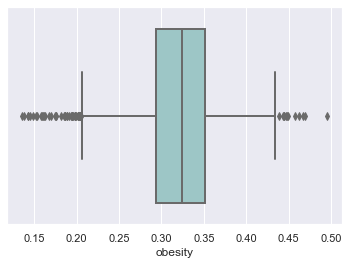

In [26]:
sns.boxplot(x="obesity", color='#96CDCD',linewidth=2, data=df_clean)
sns.set(rc = {'figure.figsize':(3,2)})

Obesity centered around 0.33.

Now, let's take a look at general distibution in a distplot.

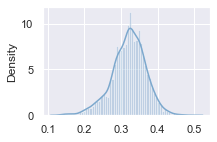

In [10]:
sns.distplot(x=df_clean.obesity, color='#7CA8CD',kde=True,bins=60)
sns.set(rc = {'figure.figsize':(8,4)})

##  EDA: Exploratory Data Analysis



Since the purpose is to explore obesity across counties, we think it is necessary to carry out analysis on state-wise features. So, we groupby state into new dataframe to see some relationship by each states. (Note: there may be some missing counties in state, so we don't consider the total/min/max values for state-wise data.

In [11]:
# State counts with obesity
all_state = pd.DataFrame(df_clean.groupby("state").mean().sort_values('obesity',ascending=False)).reset_index()
all_state.describe()

,mental_health,mental_health_total,long_commute,long_commute_total,income,obesity,obesity_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.001985,157894.021438,0.307822,52827.935662,55205.953795,0.308420,117125.195749
std,0.001183,166855.302689,0.074675,50916.777538,10279.190872,0.039999,124975.970549
min,0.000535,19581.825000,0.056714,7631.083333,39210.689189,0.216383,13980.625000
25%,0.001159,43446.471429,0.257016,16030.200000,47215.031313,0.280730,32773.971429
50%,0.001522,83494.187500,0.323207,33363.028571,54113.876404,0.307143,64974.750000
75%,0.002557,190509.132032,0.355567,66412.471549,59963.768750,0.334943,141722.279755
max,0.005957,693972.000000,0.473000,223284.258621,80153.000000,0.378973,530757.000000


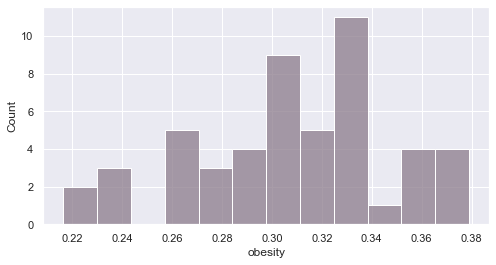

In [12]:
# Plot obesity of states
sns.histplot(data = all_state["obesity"], bins = 12, color='#8B7B8B')
sns.set(rc = {'figure.figsize':(6,3)})

From this histogram distribution, we can find that most mean value of states are clustered around 0.28-0.33 when there are some low-value and high-value states.We want to check other features by state.

Let's take a look at the state with max & min average value of obesity.

In [13]:
# state with max mean obesity
(all_state.iloc[0][0], all_state.iloc[0][-2])

('MS', 0.378972972972973)

In [14]:
# state with min mean obesity
(all_state.iloc[-1][0], all_state.iloc[-1][-2])

('CO', 0.21638333333333334)

These two numbers have a solid difference, which mean people in Colorado is about 16% less than people in Mississippi. An interesting discovery. Now, we want to look at the counties in these 2 states, and then plot features by two states.

In [15]:
max_min_county = df_clean[(df_clean['state'] == 'MS') | (df_clean['state'] == 'CO')]
max_min_county.state.unique()

array(['CO', 'MS'], dtype=object)

<AxesSubplot:xlabel='code', ylabel='obesity'>

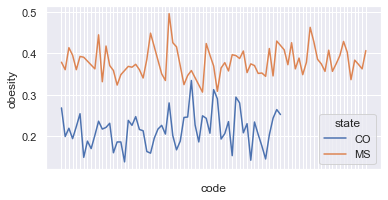

In [16]:
f1 = sns.lineplot(y='obesity', hue='state', x='code',data=max_min_county, sizes = [3])
f1.set(xticklabels=[])
f1

<AxesSubplot:xlabel='county', ylabel='obesity'>

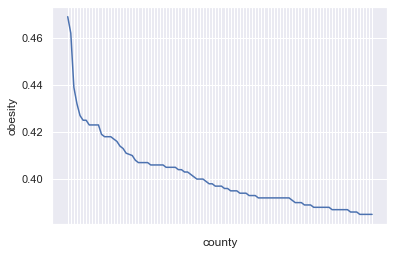

In [17]:
# Top 100 County with high obesity
top_hundred_county = df_clean.groupby("county")["obesity"].mean().sort_values(ascending=False)[:100]
top_hundred_county_df = pd.DataFrame(top_hundred_county).reset_index()
sns.set(rc = {'figure.figsize':(6,4)})
graph = sns.lineplot(x = "county", y = "obesity", data = top_hundred_county_df)
graph.set(xticklabels=[])
graph

From the graph of top 100 counties with obesity, we can find that high values drop from 0.47 to 0.42 quickly, which has a steeper slope in top 20. We want to explore the difference among counties with high values and low values.

First, let's take a look at high range and low range of obesity in counties(top 100, bottom 100). The ranges are:

In [18]:
# top 100 dataframe, bottom 100 dataframe
top_hundred = df_clean.sort_values(by=["obesity"], ascending=False)[:100]
print("Top 100 range:   ", top_hundred.obesity.iloc[0], '-', top_hundred.obesity.iloc[-1])
bottom_hundred = df_clean.sort_values(by=["obesity"], ascending=False).tail(100)
print("Bottom 100 range:", bottom_hundred.obesity.iloc[0],'-',bottom_hundred.obesity.iloc[-1])

Top 100 range:    0.495 - 0.398
Bottom 100 range: 0.226 - 0.136


The difference exists, so we want to plot some of features in these two dataframes.

Next, we need to make graphs comparing the top 100 obesity to the top 100 obesity's income, mental health, and long commute to see if there's a trend in connection with obesity.

Here, it is shown that people who have a higher income, are not in the higher obesity range at all. Therefore, having a higher income seems to lower the risk of being obese.

<Figure size 576x432 with 0 Axes>

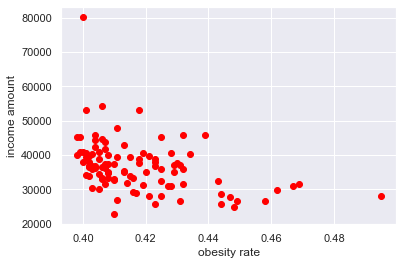

<Figure size 576x432 with 0 Axes>

In [19]:
#seeing the affects of income on obesity
plt.scatter(top_hundred['obesity'], top_hundred['income'], label='income', color="red")
plt.xlabel('obesity rate')
plt.ylabel('income amount')
plt.figure(figsize=(8, 6))

Next, we compare obesity rates to mental health provider rates. It is shown that if the county has mental health providers available, the rate of obesity is low. However, we noticed that there are not a lot of mental health providers overall so there isn't much to compare to obesity. Therefore, there is not too much of a direct relationship.

<Figure size 576x432 with 0 Axes>

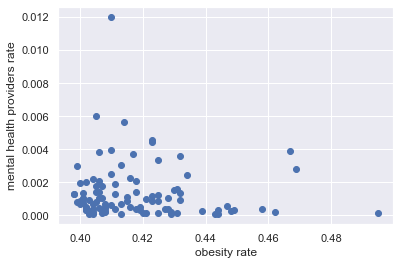

<Figure size 576x432 with 0 Axes>

In [20]:
#seeing the affects of mental health providers on obesity
plt.scatter(top_hundred['obesity'], top_hundred['mental_health'], label='mental_health')
plt.xlabel('obesity rate')
plt.ylabel('mental health providers rate')
plt.figure(figsize=(8, 6))

Lastly, we compare obesity rates to long commutes afrom work alone. It seems that the counties with 10%-50% of people who have a long commute home from work, mostly have the lowest rate of obesity ranging from 40% to 44%. The percentage of people in a county that have a long commute does not effect obesity, but overall if a person has a long commute from work to home they are more likely to not be obese.

<Figure size 576x432 with 0 Axes>

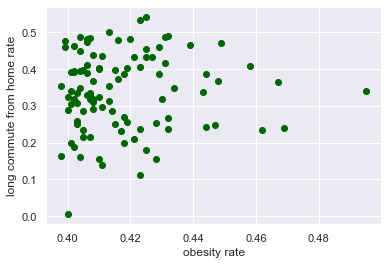

<Figure size 576x432 with 0 Axes>

In [21]:
#seeing the affects of a long commute from work alone on obesity
plt.scatter(top_hundred['obesity'], top_hundred['long_commute'], label='long_commute', color="darkgreen")
plt.xlabel('obesity rate')
plt.ylabel('long commute from home rate')
plt.figure(figsize=(8, 6))

From our visual intuition, we did not find significant relationships that we can model these feature. From the discussion of real-life understanding, we all sugguest that there may be a linear relationship between these 3 features and obeisty. Next, we are going to look at a linear regression chart to see the calculated relationship between obesity and our other variables by looking at the p-value. If p-value < 0.5 it is significant, otherwise no significant relationship.

In [22]:
y, x = patsy.dmatrices("obesity ~ income", top_hundred)
mod = sm.OLS(y, x)
res_1 = mod.fit() 
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     19.41
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           2.69e-05
Time:                        19:27:53   Log-Likelihood:                 270.20
No. Observations:                 100   AIC:                            -536.4
Df Residuals:                      98   BIC:                            -531.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4522      0.008     56.185      0.0

Since the p-value here is less than 0.5 it is significant. In other words, there is a relationship between obesity and income as we predicted.

In [23]:
y, x = patsy.dmatrices("obesity ~ mental_health", top_hundred)
mod = sm.OLS(y, x)
res_1 = mod.fit() 
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2166
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.643
Time:                        19:27:53   Log-Likelihood:                 261.27
No. Observations:                 100   AIC:                            -518.5
Df Residuals:                      98   BIC:                            -513.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4181      0.002    181.927

Since the p-value here is greater than 0.5 it is not significant. In other words, there is not a significant relationship between obesity and mental health providers, which opposes our hypothesis.

In [24]:
y, x = patsy.dmatrices("obesity ~ long_commute", top_hundred)
mod = sm.OLS(y, x)
res_1 = mod.fit() 
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2247
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.637
Time:                        19:27:53   Log-Likelihood:                 261.28
No. Observations:                 100   AIC:                            -518.6
Df Residuals:                      98   BIC:                            -513.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4147      0.006     68.817   

Since the p-value here is also greater than 0.5 it is not significant. In other words, there is not a significant relationship between obesity and a long commute from work to home, which also opposes our hypothesis.

In [25]:
y, x = patsy.dmatrices("obesity ~ income + mental_health + long_commute", top_hundred)
mod = sm.OLS(y, x)
res_1 = mod.fit() 
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     6.616
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           0.000413
Time:                        19:27:53   Log-Likelihood:                 270.56
No. Observations:                 100   AIC:                            -533.1
Df Residuals:                      96   BIC:                            -522.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4579      0.011     40.379

For all of our variables (income, mental health providers, and long commuter), when looking at the coeficient, we can see that there is a negative linear relationship between obesity and the other variables. This also shows that mental health providers and long commute does not have as much affect on obesity like income does.

For mental health providers and long commuters, we see that their confidence intervals contain 0. This means that if we run our experiment multiple times, our results will remain consistent. Still looking at the confidence interval, we can also note that income does get very close to 0, so there is a high chance that it will also stay consistent.

# Ethics & Privacy

As college students, we are aware of what obesity is and what factors can lead to it. The factors we chose are less obvious than the usual to preserve interest but they still correlate to obesity in some way.

The information gained from this data is public so we have permission to download it and use it.
We are aware that the information can cause a negative tint on certain areas in the United States based on the results we get, but that is dependent on the reader of the data we convey. 
The information that we will gain will not be co-opted for nefarious purposes since our prediction would only tell the correlation between obesity and other factories, and the information will not promote misinformation and hate speech as such.

We have one consistent data set from a credible source that documents national health rankings in the United States every year. For each variable we are looking at – obesity, income, mental health providers, and long commute – there are 3000+ counties throughout the United States to grab that information from.

Some bias that may be in our data is what is considered a “long commute” to the folks who collected this data because we don’t know the time span on that and/or if “long” is subjective to the researcher or the person being asked. Another bias can also be who exactly was interviewed in these counties because we don’t know if a certain group of people were targeted or how much effort was put in to reduce bias when collecting data. For example, this information could have been collected via mail or electronically and that can already eliminate or reduce the data we would get from people without homes or access to the internet.

The dataset is public so we can use it and individual information is not included in the dataset. All volunteers in this data will remain anonymous, and are informed about the participated research. Each entry is by county, not person, so personal information is not used.

Based on the relationship we find between the three factors and obesity, we will further analyze possible reasons of why that factor may have led to obesity and how that issue can be resolved moving forward. Our research does not only rely on one single factor, but with multiple factors so we would get a more accurate research analysis. We will be using statistical models from class to verify the effect the factors have on obesity. 


# Conclusion & Discussion

**Hypothesis Analysis:**

- In response to our hypothesis, the counties with a higher income are not in the higher obesity range. Furthermore,with p-value < 0.5 in our linear regression model, we reject the null hypothesis. This means that there is a relationship between obesity and income as we predicted. 
- If a county has mental health providers available, the rate of obesity is low. However, we also consider that there are not a lot of mental health providers. According to the linear regression result, since the p-value here is greater than 0.5, we accept the null hypothesis. In other words, there is not a significant relationship between obesity and mental health providers.
- In the same sense, if a county has a long commute from work to home, they are more likely to not be obese. Since the p-value for our linear regression model here is also greater than 0.5, we accept the null hypothesis. In other words, there is not a significant relationship between obesity and a long commute from work to home, which also opposes our hypothesis.

**Conclusion:**

- After doing an analysis on obesity and our three factors, we found that out of income rates, mental health providers, and long commutes from work alone, income rates have the most significant effect on the counties in America with the top 100 highest obesity levels. When analyzing the relationship between obesity and income we found that people who have a higher income, are not in the higher obesity range at all. Therefore, having a higher income seems to lower the risk of being obese. Which unfortunately, in our economy, makes sense; People with more income have access to healthier food options, more fit exercise options, and more time to focus on their physical well-being. This is not to say that mental health providers and long commutes home do not have an effect on obesity at all, this just shows that if we were to focus on the top influencing factor out of the 3, it would be income. 

**Limitations/Bias:**

- Our data is from 2019, the time we think there exist no significant events that have an extreme influence on people's physical health(data before 2018 is too old, and data in 2020 of health may be biased due to covid-19). The time window is fixed for our data, so if we prefer to have a time-observation analysis, it's better to provide long-term data without external extreme turbulence. Furthermore, we applied linear regression in our model, which assumes that there is no multicollinearity among independent variables. We did not explain multicollinearity comprehensively. Also, when we pick our factors, we think it is appropriate to limit the number of factors to prevent over-fit. Additionally, one limitation is that obesity is performed as a ratio. We did not explore the exact quantitive definition for obesity: for instance, people with a height of 180cm has more than 100kg are defined as obese. This is a little far from our work since we focus on the general distribution, but we can work on it in the future to classify obesity into more detailed categories. At last, we applied linear regression since we think this fits best for our factors. We still have to admit that if these factors are in a non-linear relationship, the model will have poor performance. The project advisor and the group both think the SVM can be implemented in the future, which will be addressed more in the future improvement. 

**Future Improvement:**
- With this project, we were able to find a linear relationship between income and obesity rates in a county. However, we found there wasn’t a significant relation between obesity and the other two factors based on the models we tried out for the purpose of this project. Future students could continue with the work of exploring different models such as SVM. Obesity could be categorized into several groups based on how critical an obese person’s condition is in order to be used for the model. Some of the categories could be low-risk obesity, moderate-risk obesity and high-risk obesity. With the model, students could try and figure out the tendency of a person becoming obese given the mental health provider information, the commute time and the income level of the person. Additionally, future students could try and explore relationships between the three factors (mental health providers, long commutes and income levels) and see if there’s a relation between any of these three factors.

**Real Life Suggestions:**
- We learned that there is a negative relationship between obesity and income, and this can imply that people with lower income should look out for their health. They should monitor their weight regularly, and have annual check up with their providers because our analysis has shown that they can be more likely to have higher obesity rate. Moreover, since we did not find any significant between obesity and long commute and mental health providers. We suggest that long commute and mental health providers a person has do not cause higher obesity rate. At this point of our analysis, we do not see these two factors having a huge impact on obesity rate. People should not worry too much on their weight when they long commute  often or do not have mental health providers. We hope that our study can help people to be more aware of their health and understand that there exists many other factors that can lead to obesity.

## Contributions

We all contributed to the project proposal. We then collected and narrowed down the data, as well as cleaned it. We also all worked through the EDA section and completed the conclusion. More specifically, Joon Cha was responsible for the hypothesis test and analysis. Jaida Day implemented everything into the Jupyter notebook and along with Yunyi She, worked on the Ethics section. Yunyi also worked on the real life suggestions portion of the conclusion. Lastly, Ayushi Sharma and Ziyu Wang worked on the background portion. Ayushi also worked on the future improvements portion. Ziyu Wang also worked deeper on the cleaning data portion, the limitations/bias section, and the finalizing of project report and proofreading. 

Overall, we have a really good team. Everyone did a great job at communicating, working together, and putting in the effort to get things done in a timely manner.

Thanks for reading.